# Omicron Sentiment Analysis


### We will analyze tweets on Twitter about the Omicron Variant

<a href='https://www.kaggle.com/datasets/gpreda/omicron-rising' target=_blank>You can find the data file here</a>

<img src=https://www.rapidmicrobiology.com/rmbdata/userfiles/suppliers/creative_diagnostics/2201_CreativeDiagnostics_Omicron.jpg width='400'>

In [1]:
import pandas as pd
import nltk
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

In [2]:
df=pd.read_csv("omicron.csv")

In [3]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1491840066506743820,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:22:43,Daily US Confirmed Covid Cases by County For M...,NaN,smcapplication,0,0,False
1,1491839660674490371,Gatherer Thompson,Corporate,I'm with the people who are with everyone. A s...,2009-05-10 23:01:22,639,1931,46369,False,2022-02-10 18:21:06,@Yascha_Mounk #CDC says number of fully #vacci...,"['CDC', 'vaccinated', 'Omicron', 'hospital']",Twitter Web App,0,0,False
2,1491839607368867842,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:20:54,Daily US Confirmed Covid Cases by County For L...,NaN,smcapplication,0,0,False
3,1491839207169351689,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:19:18,Daily US Confirmed Covid Cases by County For L...,NaN,smcapplication,2,1,False
4,1491839165608177667,Brownyard Group,"Bay Shore, NY",We offer liability coverage for the Security G...,2009-12-08 16:41:53,375,284,61,False,2022-02-10 18:19:08,With the #Beijing2022 #WinterOlympics already ...,"['Beijing2022', 'WinterOlympics', 'olympians',...",Agorapulse app,0,0,False


In [4]:
df.shape

(17046, 16)

In [5]:
df.isnull().sum()

id                     0
user_name              0
user_location       3613
user_description    1330
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            6827
source                 0
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [6]:
df['user_location'].value_counts()

user_location
Los Angeles, CA                 2658
India                            474
USA                              325
In Your Mind Now                 211
Chandigarh                       210
                                ... 
North Kingstown, RI                1
Global                             1
Kiev                               1
Pompano Beach, FL                  1
Auckland Region, New Zealand       1
Name: count, Length: 2473, dtype: int64

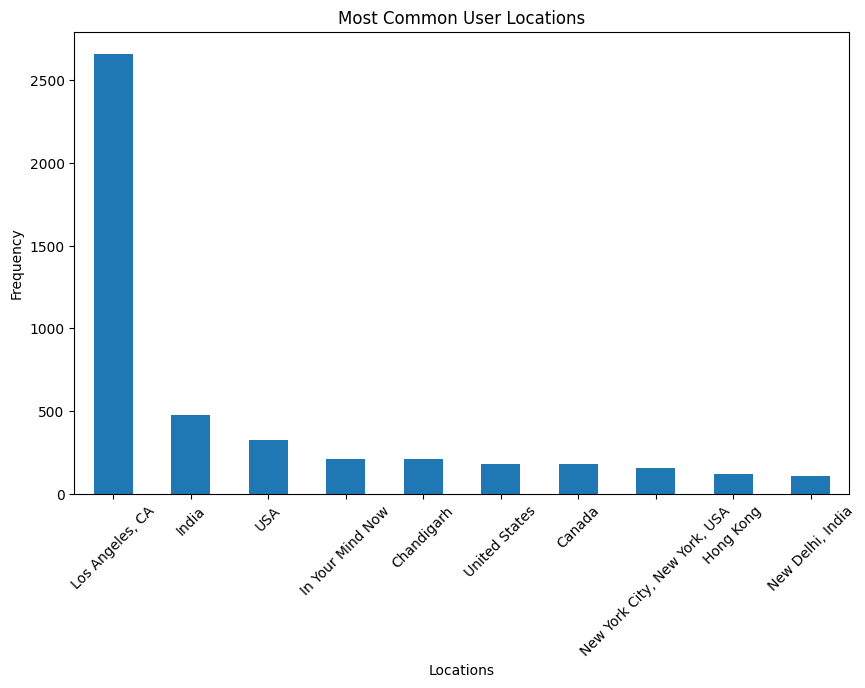

In [7]:
import matplotlib.pyplot as plt

location_counts = df['user_location'].value_counts()

# We select the top 10 locations
top_10_locations = location_counts.head(10)

plt.figure(figsize=(10, 6))
top_10_locations.plot(kind='bar')
plt.title('Most Common User Locations')
plt.xlabel('Locations')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [8]:
df['text']=df['text'].str.lower()
df['text']=df['text'].str.replace('[^\w\s]','',regex= True)
df['text']=df['text'].str.replace('\n','')
df['text']=df['text'].str.replace('\d+','', regex = True)
df['text']=df['text'].str.replace('\r','', regex = True)

In [9]:
df['text']

0        daily us confirmed covid cases by county for m...
1        yascha_mounk cdc says number of fully vaccinat...
2        daily us confirmed covid cases by county for l...
3        daily us confirmed covid cases by county for l...
4        with the beijing winterolympics already underw...
                               ...                        
17041    as more of us head back into office environmen...
17042    after long time its such a great feeling to wa...
17043    newzealand longcovidkids masks ventilation sch...
17044    can a patient be coinfected with different var...
17045    at dcyellowcab pay via electronic payments con...
Name: text, Length: 17046, dtype: object

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [11]:
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word)for word in words]

In [12]:
from textblob import TextBlob
def detect_sentiment(tweet):
    return TextBlob(tweet).sentiment.polarity

In [13]:
df['Sentiment']=df['text'].apply(detect_sentiment)

In [14]:
df.Sentiment.value_counts()

Sentiment
 0.000000    7635
 0.400000     794
 0.500000     764
 0.200000     751
 0.136364     595
             ... 
-0.106667       1
 0.455556       1
 0.059091       1
 0.321429       1
 0.038462       1
Name: count, Length: 994, dtype: int64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# 0 neutral, 1 positiv, 2 negativ
def sntmnt(score):
    if score >0.2:
        return 1
    elif score<-0.2:
        return 2
    else:
        return 0

In [17]:
df['class']=df['Sentiment'].apply(sntmnt)

<Axes: xlabel='class', ylabel='count'>

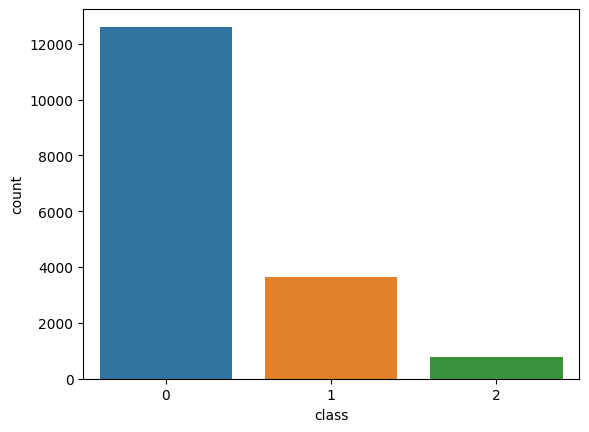

In [18]:
sns.countplot(x=df['class'])

In [19]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,3),max_features=10014,analyzer=lemmafn)

In [20]:
x=df['text']
y=df['class']

In [21]:
x

0        daily us confirmed covid cases by county for m...
1        yascha_mounk cdc says number of fully vaccinat...
2        daily us confirmed covid cases by county for l...
3        daily us confirmed covid cases by county for l...
4        with the beijing winterolympics already underw...
                               ...                        
17041    as more of us head back into office environmen...
17042    after long time its such a great feeling to wa...
17043    newzealand longcovidkids masks ventilation sch...
17044    can a patient be coinfected with different var...
17045    at dcyellowcab pay via electronic payments con...
Name: text, Length: 17046, dtype: object

In [22]:
x=vect.fit_transform(x)

# CNN

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten,Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [25]:
model=Sequential()

model.add(Dense(32,activation='relu'))
model.add(Dropout(.5))
model.add(Dense(10,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3)) 
early_stopping = EarlyStopping(monitor='val_loss', patience=3) # 3 epoch boyunca azalmazsa val_loss durdurur
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [26]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=12,
                  callbacks=[early_stopping],epochs=25,verbose=1)

Epoch 1/25
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6318 - loss: 0.8085 - val_accuracy: 0.8361 - val_loss: 0.4318
Epoch 2/25
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8425 - loss: 0.4343 - val_accuracy: 0.8663 - val_loss: 0.3669
Epoch 3/25
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8659 - loss: 0.3523 - val_accuracy: 0.8818 - val_loss: 0.3303
Epoch 4/25
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8978 - loss: 0.2848 - val_accuracy: 0.8836 - val_loss: 0.3165
Epoch 5/25
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9161 - loss: 0.2383 - val_accuracy: 0.8868 - val_loss: 0.3145
Epoch 6/25
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9165 - loss: 0.2284 - val_accuracy: 0.8859 - val_loss: 0.3259
Epoch 7/25
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9281 - loss: 0.2059 - val_accuracy: 0.8935 - val_loss: 0.3181
Epoch 8/25
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9301 - loss: 0.1989 - 

In [27]:
loss,accuracy=model.evaluate(x_test,y_test)

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 0.8995 - loss: 0.3053


In [28]:
accuracy

0.8900293111801147

In [29]:
tahmin=model.predict(x_test)

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step


In [30]:
model.save('omicron.h5')

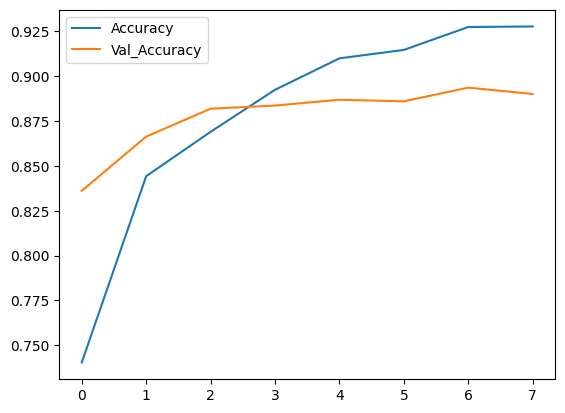

In [31]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend()

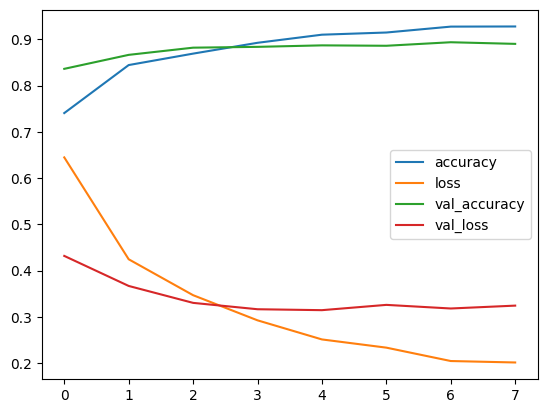

In [32]:
loss_f=pd.DataFrame(history.history)
loss_f.plot();

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [34]:
import numpy as np

In [35]:
confusion_matrix(y_test, np.argmax(tahmin, axis=1))

array([[2375,  118,   18],
       [ 150,  598,    1],
       [  86,    2,   62]])

In [36]:
cm=confusion_matrix(y_test, np.argmax(tahmin, axis=1))

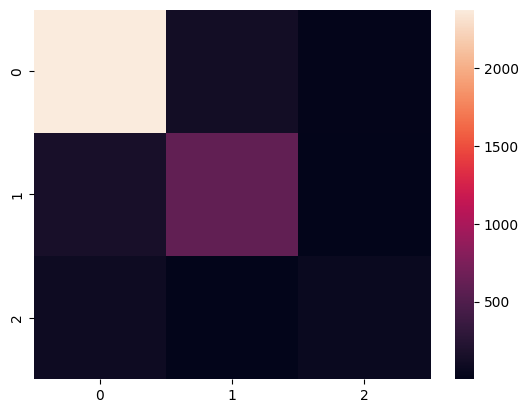

In [37]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, np.argmax(tahmin, axis=1)), annot=False);

In [38]:
print(classification_report(y_test, np.argmax(tahmin, axis=1)))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2511
           1       0.83      0.80      0.82       749
           2       0.77      0.41      0.54       150

    accuracy                           0.89      3410
   macro avg       0.84      0.72      0.76      3410
weighted avg       0.89      0.89      0.89      3410



## Sentiment analysis and Wordcloud

In [39]:
sawc= df[(df['class'] == 1) | (df['class'] == 2)]

In [40]:
df[df['class'] == 2]   # Negatif tweets

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,Sentiment,class
6,1491838918832050183,pmc,NaN,NaN,2008-03-04 14:39:58,1354,345,37425,False,2022-02-10 18:18:09,someone used the term corona to refer to the v...,"['coronavirus', 'covid', 'omicron']",Twitter for iPhone,0,0,False,-0.500000,2
39,1491833495177596939,(((TheZeteticRN))),usa,My name is Cooper. I took over my mom’s accoun...,2012-07-22 14:13:29,1253,895,137474,False,2022-02-10 17:56:36,davethemurse so sorry omicron sucks,['Omicron'],Twitter for iPhone,0,0,False,-0.400000,2
43,1491833058990903300,Genetic Literacy Project,NaN,The Genetic Literacy Project fosters dialogue ...,2012-01-20 17:34:58,19026,7404,5468,False,2022-02-10 17:54:52,omicron is a milder variant than the delta doe...,['Omicron'],Echobox,0,0,False,-0.383333,2
126,1491822704562872339,emma margaret atkinson,"Denver, CO",Exploring the mountain west. Staff writer @Rag...,2011-02-26 21:51:10,1119,942,45015,True,2022-02-10 17:13:44,parents across the countryespecially motherswe...,['Omicron'],Twitter Web App,0,0,False,-0.291667,2
181,1491812630603968515,عبدالعزيزالساحلي,"جدة, المملكة العربية السعودية",Saudi journalist *صحافي سعودي,2011-02-03 20:17:56,10169,5140,41526,False,2022-02-10 16:33:42,omicron you are the bad one,['Omicron'],Twitter for iPhone,0,0,False,-0.700000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16980,1499688816399233025,AggisLalo,NaN,🦖𝓭𝓲𝓷𝓸𝓼𝓪𝓾𝓻🦖,2021-12-27 08:38:20,136,298,9,False,2022-03-04 10:10:51,doesnt the head of fort detrick need to come o...,NaN,Twitter Web App,0,0,False,-0.450000,2
17016,1499666108370104320,Stuart W Hill,"ÜT: 51.0,-1.0",Livin' the Dream,2009-02-05 18:41:53,113,946,300,False,2022-03-04 08:40:37,day of or or or or or coronavirus shamb...,"['coronavirus', 'shambles', 'abandoned', 'dama...",Twitter Web App,0,0,False,-0.250000,2
17018,1499665497859796999,delthia ricks 🔬,New York,Award-winning science writer. Author. Citizen ...,2016-05-18 04:18:23,8763,4324,8090,False,2022-03-04 08:38:11,ambulance wait times are as long as a day in h...,['omicron'],Twitter Web App,16,16,False,-0.225000,2
17026,1499657983663517699,Lady Sherlock 🌻,Narnia,Ramblings photography and more ramblings x\n\n...,2019-08-29 10:48:04,828,712,36009,False,2022-03-04 08:08:20,you know the governments handled the pandemic ...,NaN,Twitter for Android,0,5,False,-0.350000,2


In [41]:
from wordcloud import WordCloud 
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np

In [42]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open('istockphoto-1210108540-170667a.jpg'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(" ".join(data))
    plt.imshow(wc)
    plt.axis("off")

In [43]:
good=df[df['class']==1]['text']  #positiv

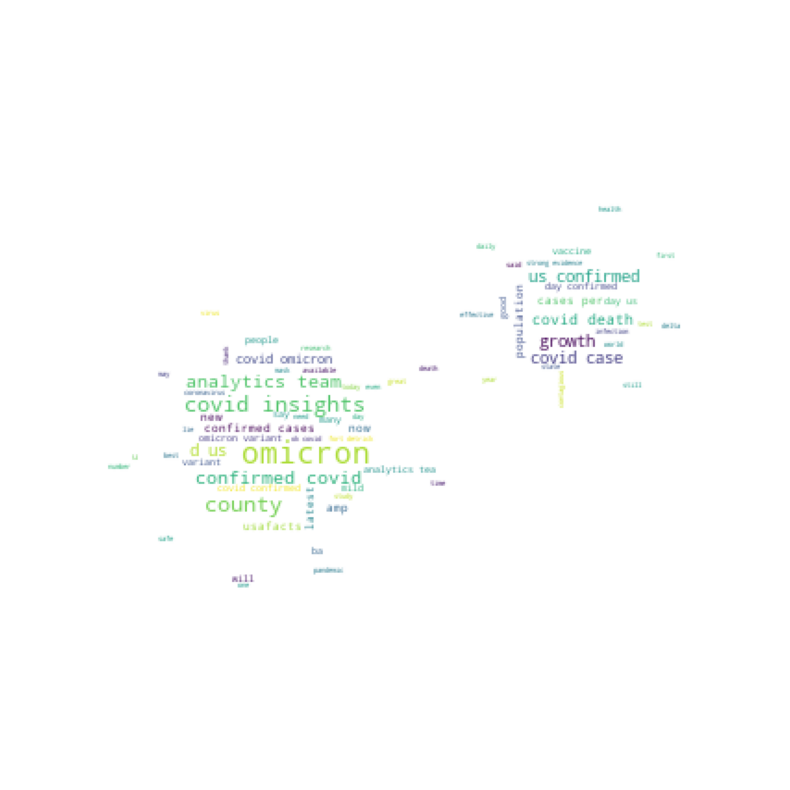

In [44]:
wc(good,'white')

In [45]:
bad=df[df['class']==1]['text'] #negativ

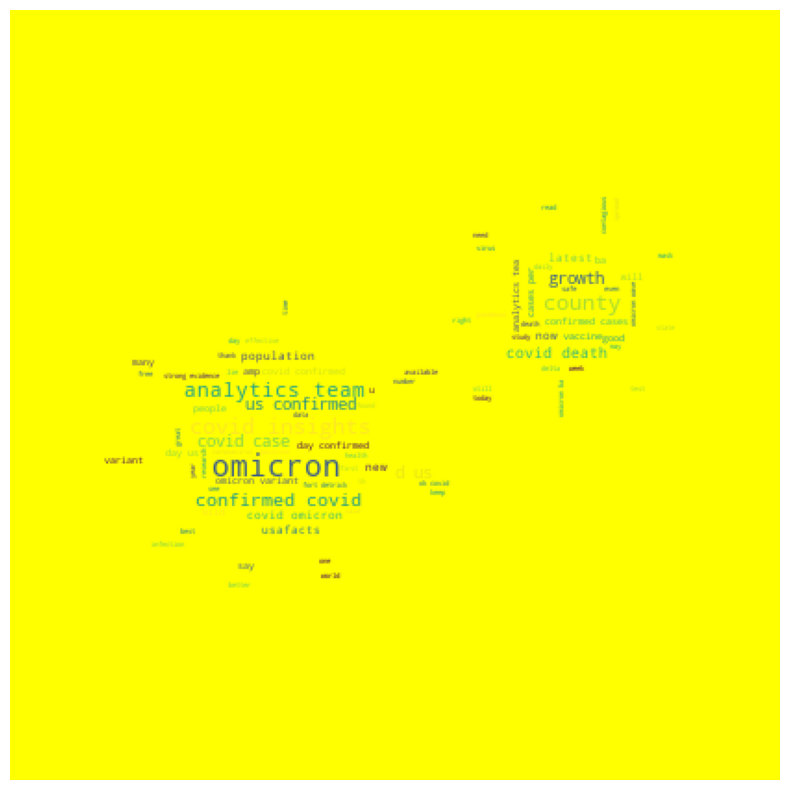

In [46]:
wc(bad,'yellow')

# accuracy: 0.8995 - loss: 0.3053